In [24]:
import numpy as np
from Strassen import strassen
from AI_mul import ai
from Binet import binet
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
def random_matrix(m, n):
    return np.random.uniform(0.00000001, 1, (m, n))

In [26]:
from time import perf_counter

def timeit(func):
    def wrapper(*args, **kwargs):
        t1 = perf_counter()
        res = func(*args, **kwargs)
        t2 = perf_counter()
        return res, round(t2 - t1, 4)
    return wrapper

In [27]:
time_strassen = timeit(strassen)
time_binet = timeit(binet)
time_ai = timeit(ai)

In [28]:
measure_binet = []
measure_strassen = []
measure_ai = []

In [29]:
for i in range(5):
    print(i)
    k = pow(2, i)
    mat1 = random_matrix(k, k)
    mat2 = random_matrix(k, k)

    bin_count, bin_time = time_binet(mat1, mat2)
    measure_binet.append((bin_count[1], bin_time))

    str_count, str_time = time_strassen(mat1, mat2)
    measure_strassen.append((str_count[1], str_time))

for a, b in [(4, 5), (16, 25)]:
    mat1 = random_matrix(a, b)
    mat2 = random_matrix(b, b)

    ai_count, ai_time = time_ai(mat1, mat2)
    measure_ai.append((ai_count[1], ai_time))

0
1
2
3
4


In [30]:
print(measure_ai)
print(measure_strassen)
print(measure_binet)

[(Counter(540, 76, 0), 0.0007), (Counter(52800, 5776, 0), 0.0631)]
[(Counter(0, 1, 0), 0.0), (Counter(18, 7, 0), 0.0001), (Counter(198, 49, 0), 0.0004), (Counter(1674, 343, 0), 0.0029), (Counter(12870, 2401, 0), 0.0176)]
[(Counter(0, 1, 0), 0.0), (Counter(4, 8, 0), 0.0001), (Counter(48, 64, 0), 0.0007), (Counter(448, 512, 0), 0.0025), (Counter(3840, 4096, 0), 0.0203)]


In [31]:
sizes1 = np.array([pow(2, i) for i in range(5)])
sizes2 = np.array([45, 1025])

In [32]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*np.power(x, b)

In [33]:
def print_all_measurements(sizes, measures):
    add_count, mul_count, time = [], [], []
    for counter, c in measures:
        add_count.append(counter.add)
        mul_count.append(counter.mul)
        time.append(c)

    data = {"Łączna liczba elementów macierzy": sizes, "Ilość dodawań": add_count, "Ilość mnożeń" : mul_count, "Czas[s]": time}
    df = pd.DataFrame(data)
    df = df.set_index("Łączna liczba elementów macierzy")
    print(df.to_latex(bold_rows=True))

In [34]:
print_all_measurements(sizes2, measure_ai)

\begin{tabular}{lrrr}
\toprule
{} &  Ilość dodawań &  Ilość mnożeń &  Czas[s] \\
\textbf{Łączna liczba elementów macierzy} &                &               &          \\
\midrule
\textbf{45                              } &            540 &            76 &   0.0007 \\
\textbf{1025                            } &          52800 &          5776 &   0.0631 \\
\bottomrule
\end{tabular}



C:\Users\michn\AppData\Local\Temp\ipykernel_6440\1419300387.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(bold_rows=True))


In [35]:
def plot_values(sizes, measures):
    add_count, mul_count, time = [], [], []
    for counter, c in measures:
        add_count.append(counter.add)
        mul_count.append(counter.mul)
        time.append(c)

    # plt.plot(sizes, mul_count, linestyle="--", marker="o")

    best_curve, curve_variance = curve_fit(func, sizes, time)
    print(best_curve)
    plt.plot(sizes, time, linestyle="None", marker="o")
    mesh = np.linspace(0, sizes[-1])
    mesh_val = func(mesh, best_curve[0], best_curve[1])
    plt.plot(mesh, mesh_val, color="red")
    plt.ylabel("Czas[s]")
    plt.xlabel("Ilość elementów")
    plt.savefig("AI-fit.png")

[5.44153811e-06 2.96618321e+00]


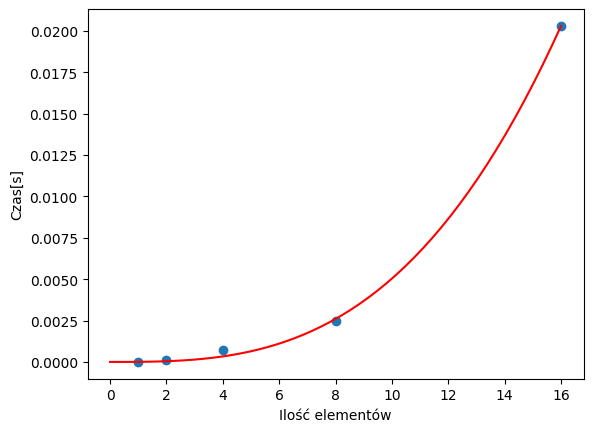

In [36]:
plot_values(sizes1, measure_binet)